**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

**Kagglehub installation**

In [2]:
!pip install kagglehub

  Using cached kagglehub-0.3.12-py3-none-any.whl.metadata (38 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kagglehub-0.3.12-py3-none-any.whl (67 kB)
Using cached PyYAML-6.0.2-cp312-cp312-macosx_11_0_arm64.whl (173 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [kagglehub]


**1. Loading dataset**

In [3]:
import kagglehub

path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')

print('path to dataset file:',path)

100%|██████████| 66.0M/66.0M [00:15<00:00, 4.56MB/s]

Extracting files...


path to dataset file: /Users/srikanthmurali/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [4]:
df = pd.read_csv(os.path.join(path,'creditcard.csv'))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Data understanding & Setup**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

**3. Exploratory Data Analysis**

**3.1 Class Distribution Plot**

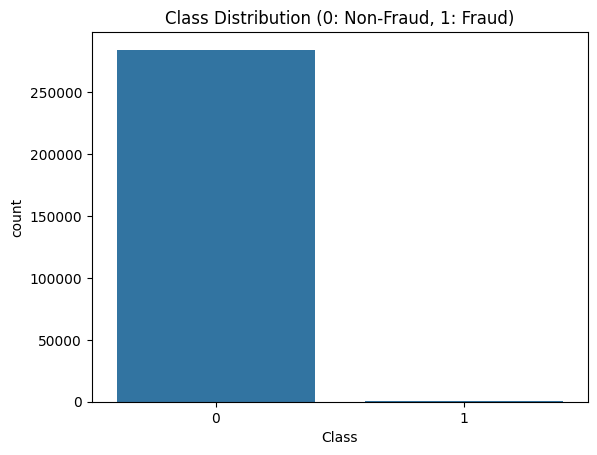

In [10]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

**3.2 Distribution of Amount and time**

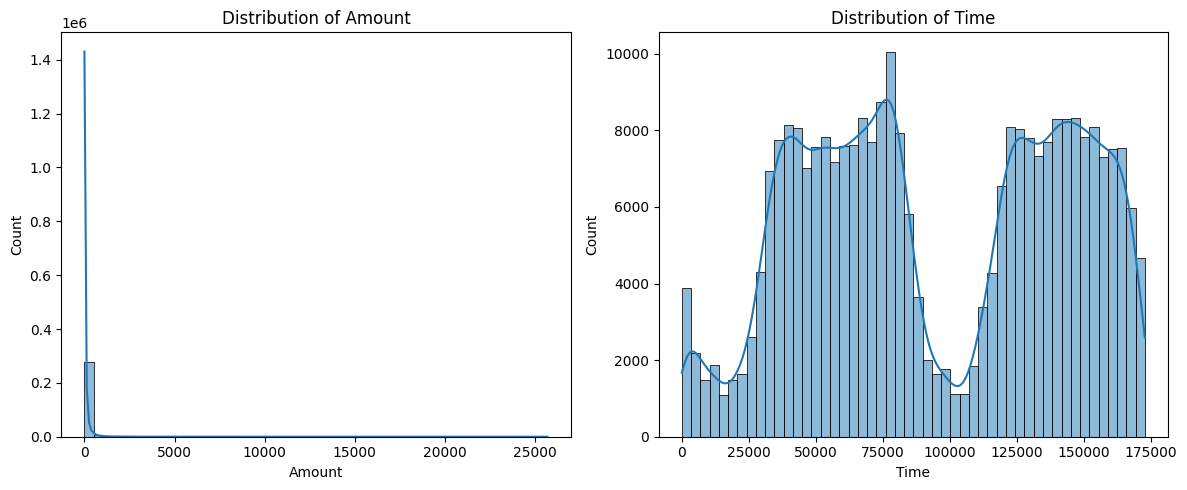

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Amount'],bins=50,kde=True)
plt.title('Distribution of Amount')

plt.subplot(1,2,2)
sns.histplot(df['Time'],bins=50,kde=True)
plt.title('Distribution of Time')

plt.tight_layout()
plt.show()

**3.3 Correlation Heatmap**

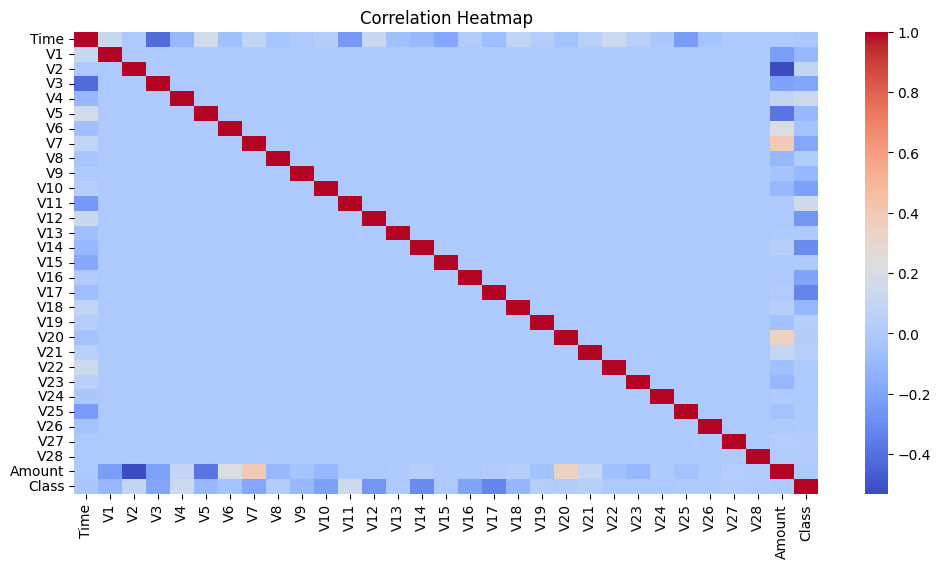

In [12]:
plt.figure(figsize=(12,6))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
corr_class = corr['Class'].sort_values(ascending=False)
print('Features most positively/negatively correlated with fraud:\n')
print(corr_class.head(10))
print(corr_class.tail(10))

Features most positively/negatively correlated with fraud:

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


**3.4 Boxplots for top fraud-correlated features**

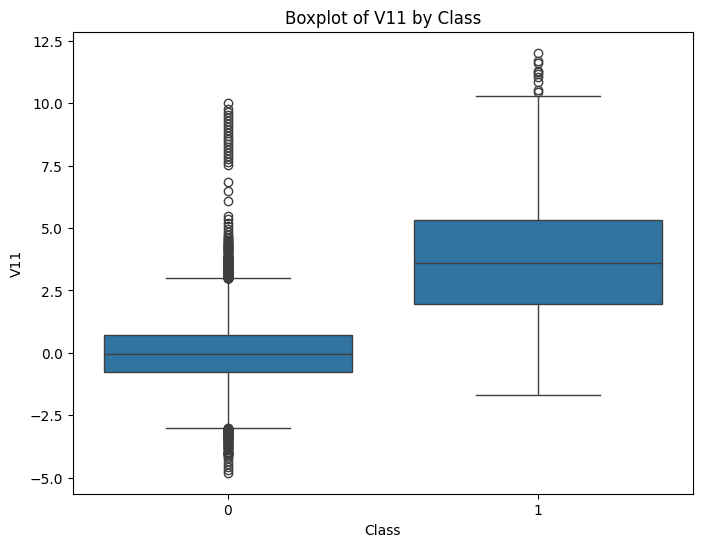

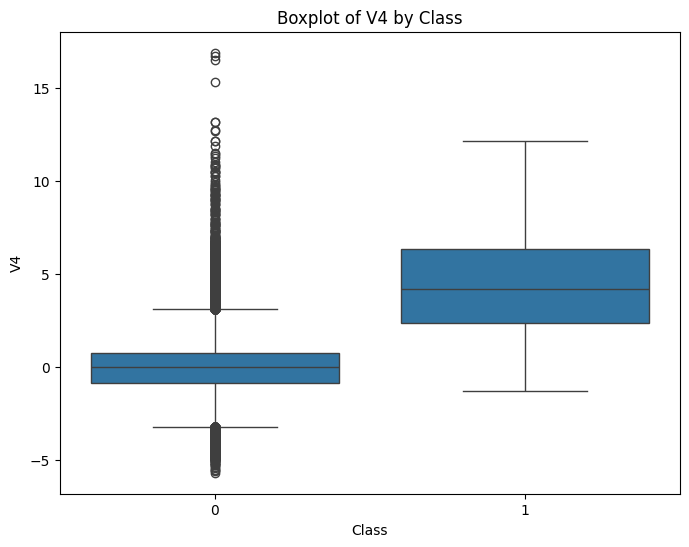

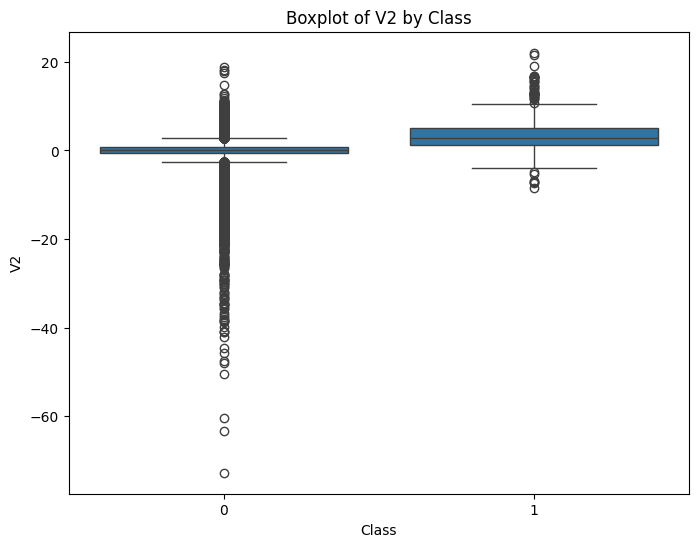

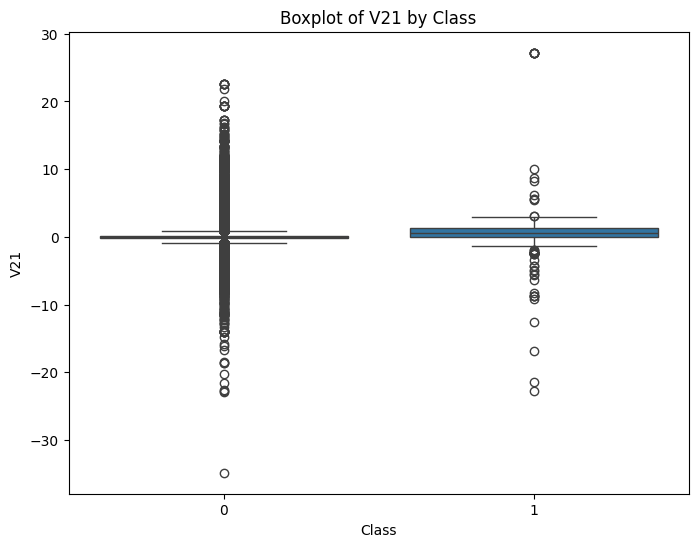

In [14]:
top_corr_features = corr_class[1:5].index.tolist()

for col in top_corr_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Class',y=col,data=df)
    plt.title(f'Boxplot of {col} by Class')
    plt.show()


**4. Feature Engineering + Handling Imbalance**

**4.1 Feature Selection**

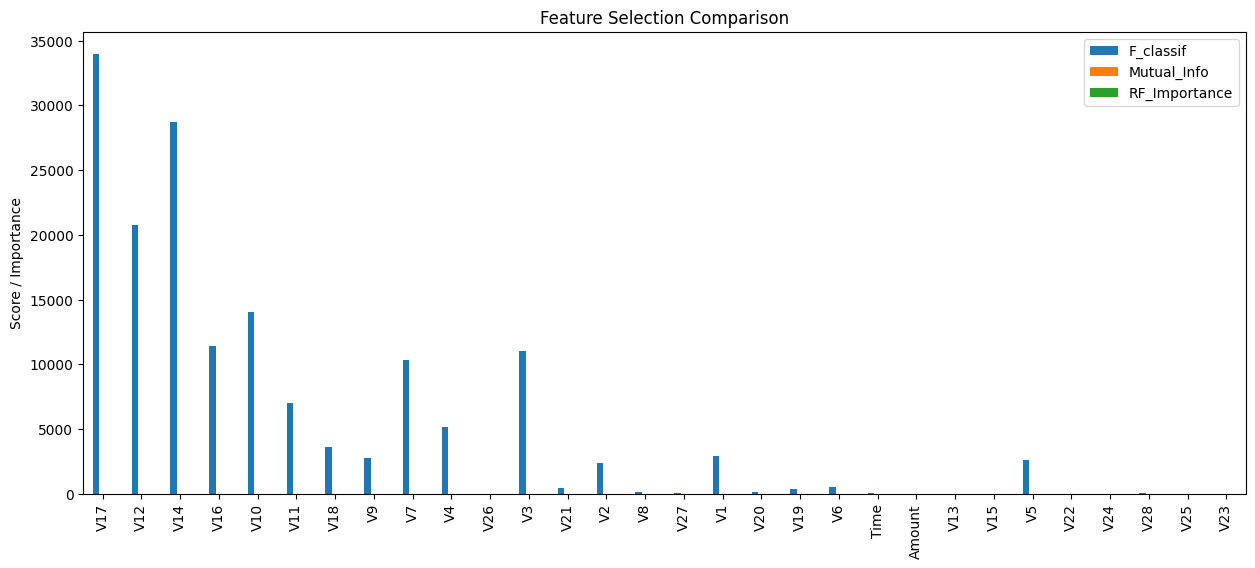

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# X = features, y = target
X = df.drop('Class', axis=1)
y = df['Class']

# 1. SelectKBest (ANOVA F-stat)
f_classif_selector = SelectKBest(score_func=f_classif, k=10)
f_classif_selector.fit(X, y)
f_classif_scores = pd.Series(f_classif_selector.scores_, index=X.columns)

# 2. Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=10)
mi_selector.fit(X, y)
mi_scores = pd.Series(mi_selector.scores_, index=X.columns)

# 3. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_scores = pd.Series(rf.feature_importances_, index=X.columns)

# Combine into one DataFrame
feature_scores = pd.DataFrame({
    'F_classif': f_classif_scores,
    'Mutual_Info': mi_scores,
    'RF_Importance': rf_scores
}).sort_values(by='RF_Importance', ascending=False)

# Visualize
import matplotlib.pyplot as plt

feature_scores.plot(kind='bar', figsize=(15, 6), title='Feature Selection Comparison')
plt.ylabel("Score / Importance")
plt.show()


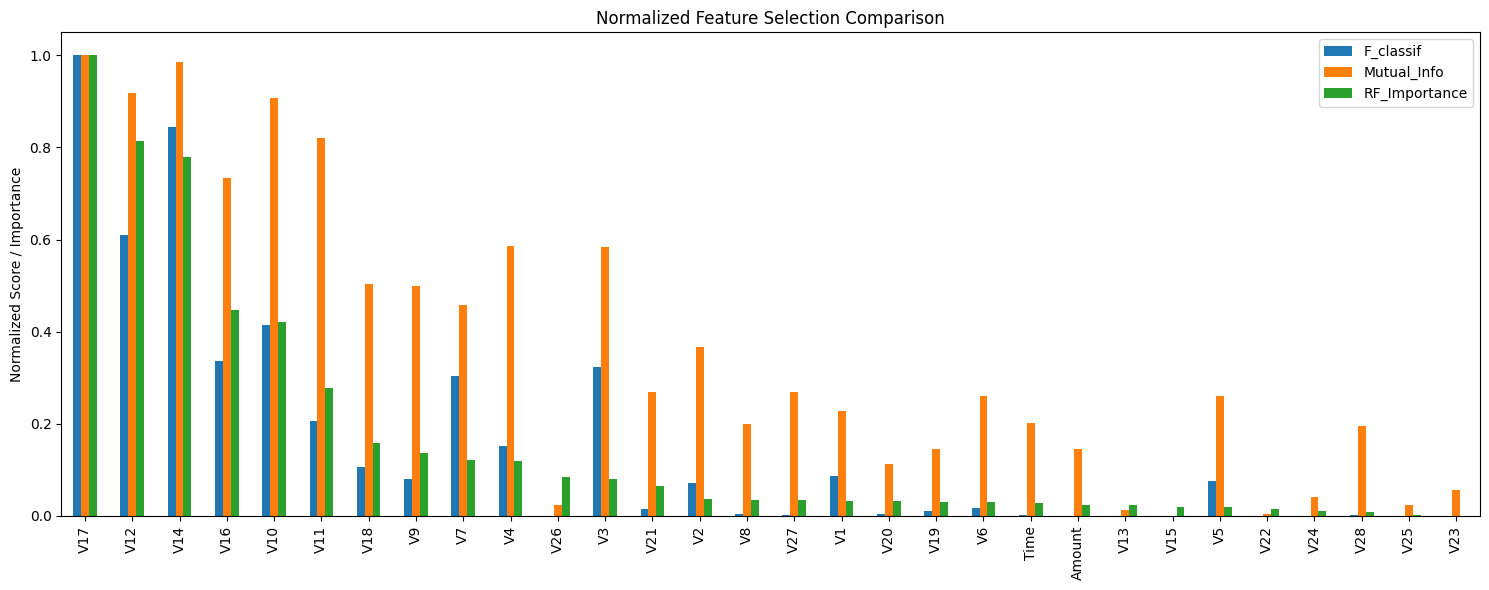

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the scores between 0 and 1 for fair comparison
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(pd.DataFrame({
    'F_classif': f_classif_scores,
    'Mutual_Info': mi_scores,
    'RF_Importance': rf_scores
}))

feature_scores_norm = pd.DataFrame(normalized_scores, index=X.columns, columns=['F_classif', 'Mutual_Info', 'RF_Importance'])
feature_scores_norm = feature_scores_norm.sort_values(by='RF_Importance', ascending=False)

# Plot again
feature_scores_norm.plot(kind='bar', figsize=(15, 6), title='Normalized Feature Selection Comparison')
plt.ylabel("Normalized Score / Importance")
plt.tight_layout()
plt.show()


In [17]:
# Take the average of the normalized scores
feature_scores_norm['Average'] = feature_scores_norm.mean(axis=1)
top_10_features = feature_scores_norm.sort_values(by='Average', ascending=False).head(10).index.tolist()

print("Top 10 Selected Features:", top_10_features)


Top 10 Selected Features: ['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V3', 'V7', 'V4', 'V18']


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Sample 50,000 rows for efficiency
df_sample = df.sample(n=50000, random_state=42)

# Use top 10 features from previous feature selection
X_top = df_sample[top_10_features]
y = df_sample['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, stratify=y, random_state=42)

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("📘 Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n🌳 Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


📘 Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9983
           1       0.88      0.41      0.56        17

    accuracy                           1.00     10000
   macro avg       0.94      0.71      0.78     10000
weighted avg       1.00      1.00      1.00     10000

ROC AUC: 0.9407640046903265

🌳 Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9983
           1       0.92      0.71      0.80        17

    accuracy                           1.00     10000
   macro avg       0.96      0.85      0.90     10000
weighted avg       1.00      1.00      1.00     10000

ROC AUC: 0.8805380912256718


**4.1 Feature Scaling (for amount and time)**

In [19]:
from sklearn.preprocessing import StandardScaler

df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount', 'Time'], axis=1, inplace=True)
df = df[['scaled_amount','scaled_time'] + [col for col in df.columns if col not in ['scaled_amount', 'scaled_time', 'Class']] + ['Class']]

**4.2 Train-Test Split**

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#

**4.3 Handle Imbalance using SMOTE**

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


**5. Model Comparison with Cross-Validation**

**5.1 Import and Initialize Models**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

models = {'Logistic Regression':LogisticRegression(max_iter=1000,random_state=42),'Decision Tree':DecisionTreeClassifier(random_state=42),'Random Forest':RandomForestClassifier(n_estimators=50,random_state=42),'SVM':SVC(),'KNN':KNeighborsClassifier(),'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)}

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/srikanthmurali/Projects/creditcardfrauddetection/fraud_env/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <98D50080-9632-3EA4-B874-146E55453763> /Users/srikanthmurali/Projects/creditcardfrauddetection/fraud_env/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/Users/srikanthmurali/miniforge3/lib/python3.12/lib-dynload/../../libomp.dylib' (no such file), '/Users/srikanthmurali/miniforge3/bin/../lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS@rpath/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/Users/srikanthmurali/miniforge3/lib/python3.12/lib-dynload/../../libomp.dylib' (no such file), '/Users/srikanthmurali/miniforge3/bin/../lib/libomp.dylib' (no such file)"]


In [ ]:
X_sample = X_train_resampled[:50000]
y_sample = y_train_resampled[:50000]

**5.2 Evaluate using Cross-validation**

In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, X_sample, y_sample, cv=3, scoring='f1')
    print(f'{name}:Mean F1 score= {np.mean(scores):4f}')

Logistic Regression:Mean F1 score= 0.709005
Decision Tree:Mean F1 score= 0.673819
Random Forest:Mean F1 score= 0.797760
SVM:Mean F1 score= 0.489591
KNN:Mean F1 score= 0.788174
XGBoost:Mean F1 score= 0.822352


**6. Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#XGBoost

xgb_params = {'n_estimators-':[50,100],'max_depth':[3,5],'subsample':[0.8,1.0]}
xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb_grid = GridSearchCV(xgb,xgb_params,cv=3,scoring='f1',n_jobs=-1,verbose=1)
xgb_grid.fit(X_sample,y_sample)

#Randomforest
rf_params = {'n_estimators':[50,100],'max_depth':[5,10],'min_samples_split':[2,5]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf,rf_params,cv=3,scoring='f1',n_jobs=-1,verbose=1)
rf_grid.fit(X_sample,y_sample)

#KNN
knn_params = {'n_neighbors':[3,5,7],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn,knn_params,cv=3,scoring='f1',n_jobs=-1,verbose=1)
knn_grid.fit(X_sample,y_sample)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [ ]:
print('XGBoost best params:',xgb_grid.best_params_)
print('XGBoost best F1 score:',xgb_grid.best_score_)

print('Random Forest best params:',rf_grid.best_params_)
print('Random Forest best F1 score:',rf_grid.best_score_)

print('KNN best params:',knn_grid.best_params_)
print('KNN best F1 score:',knn_grid.best_score_)

XGBoost best params: {'max_depth': 5, 'n_estimators-': 50, 'subsample': 0.8}
XGBoost best F1 score: 0.836996336996337
Random Forest best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest best F1 score: 0.8122157244964262
KNN best params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
KNN best F1 score: 0.7960304802410065


**7. Final model evaluation**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

best_xgb = xgb_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_knn = knn_grid.best_estimator_

models = {'XGBoost':best_xgb,'Random Forest':best_rf,'KNN':best_knn}

for name,model in models.items():
  print(f'\n== {name} ===')
  y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print('Confusion Matrix:\n:',confusion_matrix(y_test,y_pred))


== XGBoost ===

== Random Forest ===

== KNN ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.72      0.79        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
: [[56853    11]
 [   27    71]]


**8. Finalize summarize results**

**8.1 ROC Curve**

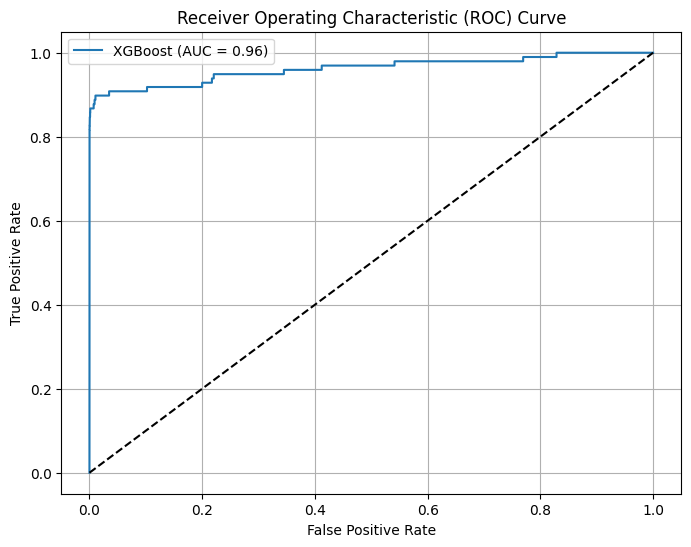

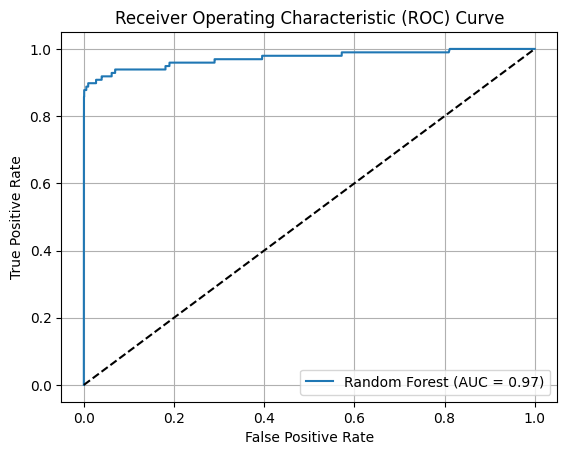

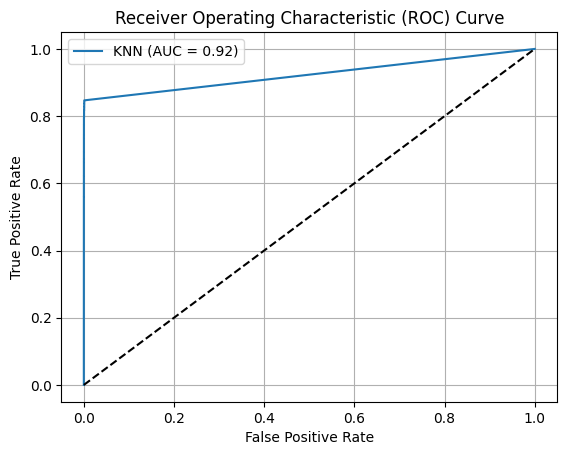

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    'XGBoost':best_xgb,
    'Random Forest':best_rf,
    'KNN':best_knn
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()

**8.2 Precision-Recall curve**

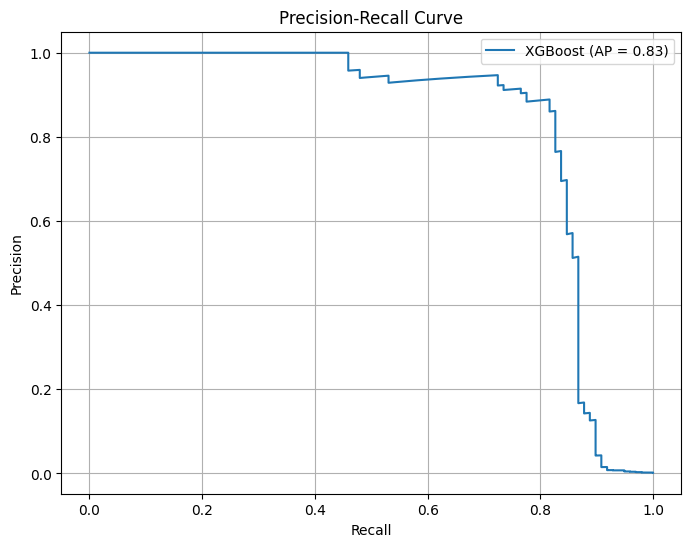

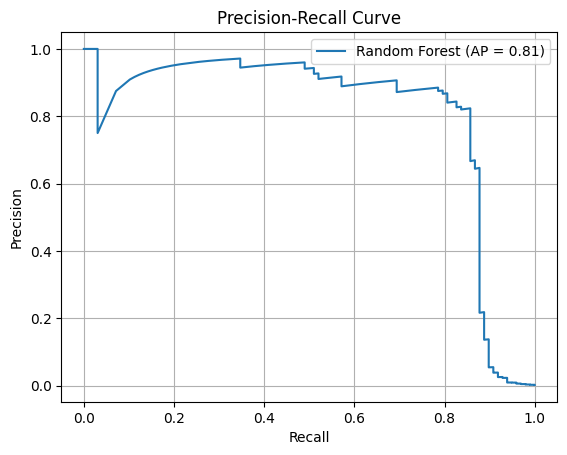

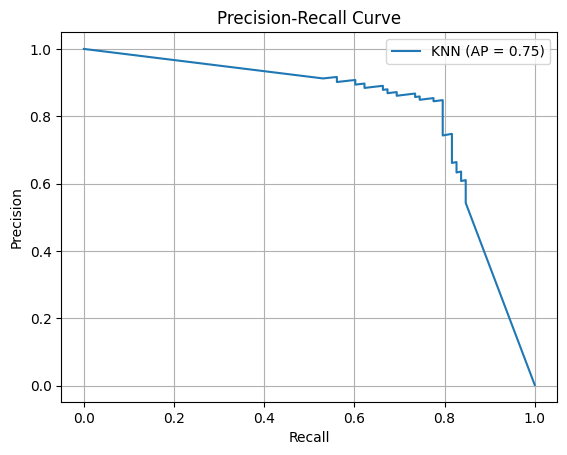

In [ ]:
from sklearn.metrics import precision_recall_curve,average_precision_score

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    average_prec = average_precision_score(y_test, y_probs)

    plt.plot(recall, precision, label=f'{name} (AP = {average_prec:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

**8.3 Bar plot of F1 scores**

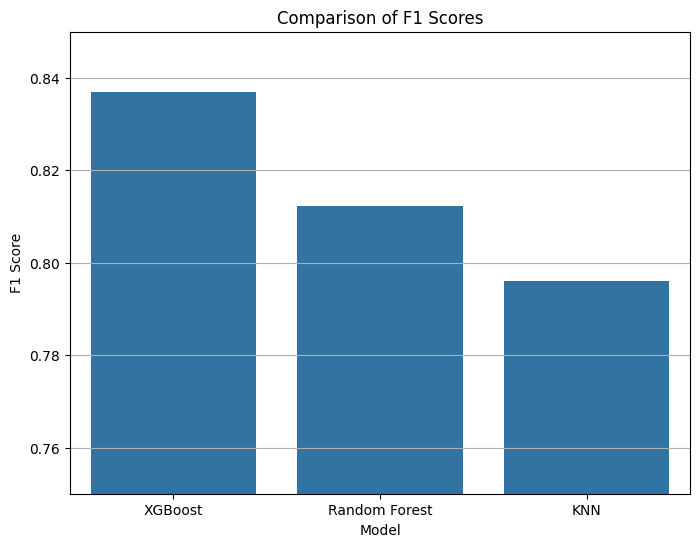

In [ ]:
f1_scores = {
    'XGBoost': xgb_grid.best_score_,
    'Random Forest': rf_grid.best_score_,
    'KNN': knn_grid.best_score_
}

f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='F1 Score', data=f1_df)
plt.ylim(0.75, 0.85)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.grid(axis='y')
plt.title('Comparison of F1 Scores')
plt.show()

**9. Saving the model**

In [ ]:
import joblib

joblib.dump(best_xgb,'best_xgb.pkl')
joblib.dump(best_rf,'best_rf.pkl')
joblib.dump(best_knn,'best_knn.pkl')

['best_knn.pkl']